In [64]:
from pydtmc import *
import numpy as np
import matplotlib.pyplot as plt

Primero establecemos la probabilidad $p$ y el número de éxitos consecutivos deseados $k$.

In [65]:
p = 0.3
k = 3

A partir de estos valores, podemos generar la matriz de transición de nuestra cadena de Markov.

Nuestra cadena de Markov tendrá $k+1$ estados, correspondientes a tener 0 éxitos consecutivos, 1 éxito consecutivo, etc, hasta $k$.

En un determinado ensayo, tenemos una probabilidad $p$ de pasar de $n$ éxitos a $n+1$ éxitos, y una probabilidad de $1-p$ de volver a 0 éxitos consecutivos.

Esto se corresponde (si ordenamos los estados de menor a mayor) a una matriz de transición con $1-p$ en toda la primer columna (salvo en la última fila), y $p$ en las celdas de forma $(i, i+1)$.

La última fila, que representa el estado en el que llegamos a los $k$ éxitos consecutivos, representará un estado absorbente.

Para un proceso con $p = 0.3$ y $k = 3$, nuestra matriz será

$$ P =
\begin{pmatrix}
0.7 & 0.3 & 0 & 0 \\
0.7 & 0 & 0.3 & 0 \\
0.7 & 0 & 0 & 0.3 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

In [66]:
t = np.block([
     [np.ones((k, 1)) * (1 - p), np.eye(k) * p],
     [np.eye(1, k + 1, k)]
     ])

mc = MarkovChain(t, [f"{i}" for i in range(k + 1)])
print(mc)


DISCRETE-TIME MARKOV CHAIN
 SIZE:           4
 RANK:           4
 CLASSES:        2
  > RECURRENT:   1
  > TRANSIENT:   1
 ERGODIC:        NO
  > APERIODIC:   YES
  > IRREDUCIBLE: NO
 ABSORBING:      YES
 REGULAR:        NO
 REVERSIBLE:     YES
 SYMMETRIC:      NO



Una vez tenemos nuestra cadena, podemos simular transiciones.

In [81]:
walks = [ mc.walk(1000000, "0", str(k)) for _ in range(1000) ]

Podemos graficar las distintas caminatas en un histograma

0

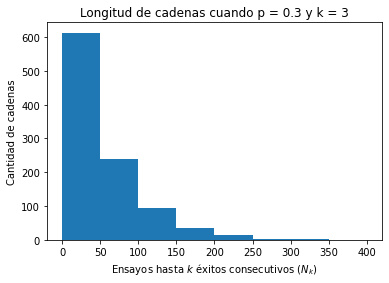

In [68]:
plt.hist([len(w) for w in walks], np.arange(0, 450, 50))
plt.title(f"Longitud de cadenas cuando p = {p} y k = {k}")
plt.xlabel("Ensayos hasta $k$ éxitos consecutivos ($N_k$)")
plt.ylabel("Cantidad de cadenas")
# plt.show()
a = [len(w) for w in walks]
len([x for x in a if x < 400 and x >= 350])

Por último, podemos estimar el valor esperado de la cantidad de ensayos necesarios calculando el promedio de las longitudes de las cadenas

In [82]:
np.mean([ len(w) for w in walks ])

50.999

También podemos sacarlo analíticamente

In [76]:
terms = 1000000
f = [[None for _ in range(k+1)] for _ in range(terms)]
def efe(n, i):
  if f[n-1][i] is not None:
    return f[n-1][i]
  if n == 1:
    f[n-1][i] = t[i][k]
  elif i == k - 1:
    f[n-1][i] = (1-p)*efe(n-1, 0)
  else:
    f[n-1][i] = p*(efe(n-1, i+1)) + (1 - p) * efe(n-1, 0)
  return f[n-1][i]
sum((i+1) * efe(i+1, 0) for i in range(terms))

51.48148148148103